In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['figure.figsize'] = [17, 4]
matplotlib.rcParams['axes.grid'] = True

In [2]:
# !pip install --upgrade pip --proxy=https://web-proxy.labs.hpecorp.net:8088
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
import sys
sys.path.insert(0, '../')

from lib_data import *
from lib_nn_dpe import NN_dpe

In [4]:
load_workspace(vars(), '../data/20190821-051552-mnist_xs')
load_workspace(vars(), '../data/20200130-100802-mnist_config')

/Users/canli/.virtualenvs/py37/lib/python3.7/site-packages/dill/_dill.py:472: UserWarning: This figure was saved with matplotlib version 3.1.1 and is unlikely to function correctly.
  obj = StockUnpickler.load(self)


Loaded: In, Out, weights, train_images, train_labels, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, xs, acc, result, x1, 
Loaded: xs, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, finalGconv, weights, 


In [5]:
del train_images
del train_labels
# del test_images
# del test_labels
del xs

In [6]:
from lib_ecc import *

## Construct NN

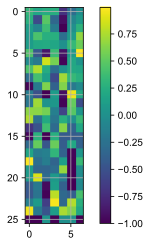

In [7]:
nn = NN_dpe(weights)
nn.Gratio = 100e-6
plt.imshow(nn.Mconv); plt.colorbar()

## ECC matrix

7 4.0 7.0
The number of redundancy column is chosen to be the smallest even number 8
(26, 15)


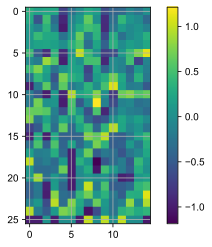

In [8]:
from dpeECC import dpeECC

delta = 1
Delta = 8 * delta

m = nn.Mconv.shape[0]
k = nn.Mconv.shape[1]

print(k, np.ceil(np.sqrt(k+1))+1, 2*k/(np.floor(Delta/(2*delta))-2))

ecc = dpeECC(nn.Mconv, delta, Delta)
M_conv_ecc = ecc.encode()

print('The number of redundancy column is chosen to be the smallest even number', ecc.r)
print(M_conv_ecc.shape)

plt.imshow(M_conv_ecc); plt.colorbar()

Convert to conductance

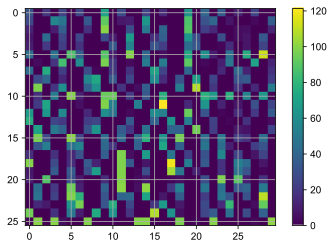

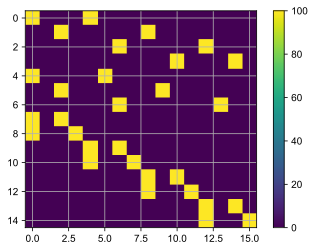

In [9]:
G_conv_ecc = weight2conductance(M_conv_ecc)
G_parity_ecc = weight2conductance(ecc.H.T)

plt.figure(1)
plt.imshow(G_conv_ecc * 1e6); plt.colorbar()

plt.figure(2)
plt.imshow(G_parity_ecc * 1e6); plt.colorbar()

# Load the data

In [14]:
dir_data = '/Volumes/T7 Touch/SuperT/' # mac
# dir_data = 'X:/SuperT/'

# load_workspace(vars(), filename=dir_data + '20200624-081921-multi-gain-repeat-all')
load_workspace(vars(), filename=dir_data + '20200624-104107-cnn-accuracy-delta1')

Loaded: In, Out, y1_list, cnn_y1_list, delta_list, acc_list, delta, Delta, weights, train_images, train_labels, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, xs, acc, result, x1, y_pred, y1, k, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, 


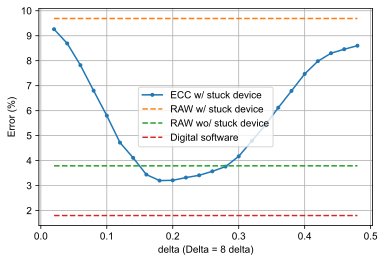

In [16]:
plt.plot(delta_list, [100-acc for acc in acc_list], '.-', label='ECC w/ stuck device')

plt.plot(delta_list, [100-90.31 for _ in delta_list], '--', label='RAW w/ stuck device')
plt.plot(delta_list, [100-96.21 for _ in delta_list], '--', label='RAW wo/ stuck device')
plt.plot(delta_list, [100-98.20 for _ in delta_list], '--', label='Digital software')

plt.xlabel('delta (Delta = 8 delta)')
plt.ylabel('Error (%)')
# plt.yscale('log')
plt.legend()

In [18]:
np.array(cnn_y1_list).shape

(10000, 400, 15)